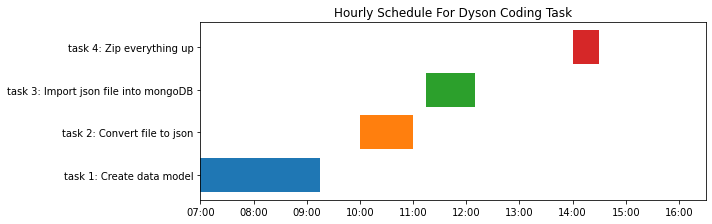

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import math

def timestr_to_num(timestr):
    return mdates.date2num(datetime.strptime('0' + timestr if timestr[1] == ':' else timestr, '%I:%M:%S %p'))

df = pd.DataFrame({'start': ['7:00:00 AM', '10:00:00 AM', '11:15:00 AM', '2:00:00 PM'],
                   'finish': ['9:15:00 AM', '11:00:00 AM', '12:10:00 PM', '2:30:00 PM'],
                   'operation': ['task 1: Create data model', 'task 2: Convert file to json', 
                                 'task 3: Import json file into mongoDB', 'task 4: Zip everything up'],
                   'short_text': ['short text 1', 'short text 2', 'short text 1', 'short text 2']})

fig, ax = plt.subplots(figsize=(10, 3))
operations = pd.unique(df['operation'])
colors = plt.cm.tab10.colors  # get a list of 10 colors
colors *= math.ceil(len(operations) / (len(colors)))  # repeat the list as many times as needed
for operation, color in zip(operations, colors):
    for row in df[df['operation'] == operation].itertuples():
        left = timestr_to_num(row.start)
        right = timestr_to_num(row.finish)
        ax.barh(operation, left=left, width=right - left, height=0.8, color=color)
ax.set_xlim(timestr_to_num('07:00:00 AM'), timestr_to_num('4:30:00 PM'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # display ticks as hours and minutes
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # set a tick every hour
plt.tight_layout()
plt.title('Hourly Schedule For Dyson Coding Task')
plt.show()